# 1. Preparing enviourment

In [1]:
%%configure -f
{     "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
          "spark.driver.memory": "30720M",
          "kind":"pyspark"
    }
         
}

In [2]:
%%info

In [3]:
spark.sparkContext.getConf().get('spark.driver.memory')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1676230331888_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'30720M'

## Installing packages

In [4]:
# Installing custom packages
sc.uninstall_package('pip')
sc.install_pypi_package('pip==23.0')
sc.install_pypi_package("pandas", "https://pypi.org/simple")
sc.install_pypi_package("requests", "https://pypi.org/simple")
sc.install_pypi_package("matplotlib", "https://pypi.org/simple")
sc.install_pypi_package("ipython", "https://pypi.org/simple")
sc.install_pypi_package("xml-python")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Uninstalling pip-9.0.1:
  Successfully uninstalled pip-9.0.1

  Using cached pip-23.0-py3-none-any.whl (2.1 MB)

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)

  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-3.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (170 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)

  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.4.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux

In [5]:
# Checking installed packages
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- ----------
attrs                      22.2.0
aws-cfn-bootstrap          2.0
backcall                   0.2.0
beautifulsoup4             4.9.3
boto                       2.49.0
certifi                    2022.12.7
charset-normalizer         3.0.1
click                      8.1.1
cycler                     0.11.0
decorator                  5.1.1
docutils                   0.14
fonttools                  4.38.0
idna                       3.4
ipython                    7.34.0
jedi                       0.18.2
jmespath                   1.0.0
joblib                     1.1.0
kiwisolver                 1.4.4
lockfile                   0.11.0
lxml                       4.8.0
matplotlib                 3.5.3
matplotlib-inline          0.1.6
mysqlclient                1.4.2
nltk                       3.7
nose                       1.3.4
numpy                      1.20.0
packaging                  23.0
pandas                     1.3.5

# 2. Preparing Data

## Working days 2021-2022

In [6]:
import calendar

def work_days_calendar(modulo):
    work_days_calendar = []
    years = (2021, 2022)
    free_days = {
        2021: {
            1: (1,6),
            2: (0,0),
            3: (0,0),
            4: (4,5),
            5: (1,3,23),
            6: (3,0),
            7: (0,0),
            8: (15,0),
            9: (0,0),
            10: (0,0),
            11: (1,11),
            12: (25,26)
        },
    
        2022: {
            1: (1,6),
            2: (0,0),
            3: (0,0),
            4: (17,18),
            5: (1,3),
            6: (5,16),
            7: (0,0),
            8: (15,0),
            9: (0,0),
            10: (0,0),
            11: (1,11),
            12: (25,26)
        }
    }
    for year in years:
        for month in range(1, 13):
            for data in calendar.Calendar().itermonthdates(year,month):
                if data.month == month:
                    if data.isoweekday() < 6:
                        try:
                            if data.day not in free_days[year][month]:
                                if modulo == True:
                                    
                                    work_days_calendar.append(str(data.year % 2000) + 
                                    (('0' + str(data.month)) if data.month < 10 else str(data.month)) + 
                                    (('0' + str(data.day)) if data.day < 10 else str(data.day)))
                                else:
                                    work_days_calendar.append(str(data.year) + 
                                    (('0' + str(data.month)) if data.month < 10 else str(data.month)) + 
                                    (('0' + str(data.day)) if data.day < 10 else str(data.day)))                                    
                        except KeyError:
                            continue
    work_days_calender_t = tuple(work_days_calendar)

    return work_days_calender_t


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Download Exchange rate USD/PLN

In [7]:
import requests
import xml.etree.ElementTree as ET

kursy_dolara = []
table_no = "001"
date_no = "210104"
valid_calendar = work_days_calendar(modulo=True)
for tab in range(1, 507):  
    if tab < 255:  
        if tab < 10:
            URL_template = f"https://static.nbp.pl/dane/kursy/xml/a00{tab}z{valid_calendar[tab-1]}.xml"
        elif tab < 100:
            URL_template = f"https://static.nbp.pl/dane/kursy/xml/a0{tab}z{valid_calendar[tab-1]}.xml"
        else:
            URL_template = f"https://static.nbp.pl/dane/kursy/xml/a{tab}z{valid_calendar[tab-1]}.xml"
    else:
        if tab-254 < 10:
            URL_template = f"https://static.nbp.pl/dane/kursy/xml/a00{tab-254}z{valid_calendar[tab-1]}.xml"
        elif tab-254 < 100:
            URL_template = f"https://static.nbp.pl/dane/kursy/xml/a0{tab-254}z{valid_calendar[tab-1]}.xml"
        else:
            URL_template = f"https://static.nbp.pl/dane/kursy/xml/a{tab-254}z{valid_calendar[tab-1]}.xml"       

    response = requests.get(URL_template)
    with open(f'{tab}.xml', 'wb') as f:
        f.write(response.content)
    tree = ET.parse(f'{tab}.xml')
    root = tree.getroot()
    usd1 = root[3][3].text
    kursy_dolara.append(usd1)
print(f"{kursy_dolara}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['3,6998', '3,7031', '3,6656', '3,6919', '3,7271', '3,7188', '3,7142', '3,7323', '3,7466', '3,7699', '3,7416', '3,7303', '3,7312', '3,7255', '3,7402', '3,7512', '3,7507', '3,7566', '3,7460', '3,7323', '3,7311', '3,7352', '3,7509', '3,7554', '3,7301', '3,6972', '3,6973', '3,7117', '3,7186', '3,6949', '3,6940', '3,7287', '3,7152', '3,6997', '3,7135', '3,7117', '3,7145', '3,6943', '3,7247', '3,7572', '3,7765', '3,7509', '3,7851', '3,8393', '3,8665', '3,8507', '3,8420', '3,8287', '3,8521', '3,8429', '3,8519', '3,8676', '3,8705', '3,8865', '3,8768', '3,8746', '3,9098', '3,9253', '3,9307', '3,9570', '3,9604', '3,9676', '3,9428', '3,8986', '3,8973', '3,8611', '3,8365', '3,8208', '3,8144', '3,8342', '3,8065', '3,8014', '3,7978', '3,7816', '3,7737', '3,7950', '3,7885', '3,7855', '3,7657', '3,7826', '3,7939', '3,7786', '3,7746', '3,7940', '3,8136', '3,8066', '3,7861', '3,7493', '3,7514', '3,7456', '3,7675', '3,7374', '3,7288', '3,7050', '3,7087', '3,7077', '3,6778', '3,6795', '3,6549', '3,6691',

## Importing data

In [8]:
from pyspark.sql.types import StringType


# Read file
sdf_transaction = spark.read.parquet("s3a://aws-public-blockchain/v1.0/btc/transactions")
sdf_transaction.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------+----+--------------------+------------+------------+---------+-----------+------------+-----------+--------------------+--------------------+-------------------+----------+
|                hash|version|size|          block_hash|block_number|virtual_size|lock_time|input_count|output_count|is_coinbase|        output_value|             outputs|    block_timestamp|      date|
+--------------------+-------+----+--------------------+------------+------------+---------+-----------+------------+-----------+--------------------+--------------------+-------------------+----------+
|8ab40432a91ef1855...|      1| 668|00000000000000000...|      492371|         668|        0|          4|           2|      false|           0.0017739|[[0, 1, OP_DUP OP...|2017-10-30 17:37:54|2017-10-30|
|e6ee4f559d8c6f893...|      1| 666|00000000000000000...|      492386|         666|        0|          2|           2|      false|          0.42275754|[[0, 1, OP_HASH16...|2017-10-30 19:51:

In [9]:
# Get USD/PLN exchange rate
usd_to_pln_df = spark.read.csv("s3a://bucketmiloszroszak/USD_PLN_courses.csv")
usd_to_pln_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+
|   _c0|
+------+
|3.6998|
|3.7031|
|3.6656|
|3.6919|
|3.7271|
|3.7188|
|3.7142|
|3.7323|
|3.7466|
|3.7699|
|3.7416|
|3.7303|
|3.7312|
|3.7255|
|3.7402|
|3.7512|
|3.7507|
|3.7566|
| 3.746|
|3.7323|
+------+
only showing top 20 rows

In [10]:
# Get BTC to USD daily exchange rate
btc_to_usd_df = spark.read.csv("s3a://bucketmiloszroszak/valid_date_btc_to_usd.csv")
btc_to_usd_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------+
|     _c0|           _c1|
+--------+--------------+
|20210104|33000.05000000|
|20210105|31989.75000000|
|20210107|36769.36000000|
|20210108|39432.48000000|
|20210111|38150.02000000|
|20210112|35410.37000000|
|20210113|34049.15000000|
|20210114|37371.38000000|
|20210115|39145.21000000|
|20210118|35824.99000000|
|20210119|36622.46000000|
|20210120|35901.94000000|
|20210121|35468.23000000|
|20210122|30851.99000000|
|20210125|32259.45000000|
|20210126|32254.19000000|
|20210127|32464.01000000|
|20210128|30362.19000000|
|20210129|33368.18000000|
|20210201|33092.97000000|
+--------+--------------+
only showing top 20 rows

In [11]:
# Get BTC to PLN daily exchange rate
btc_to_pln_df = spark.read.csv("s3a://bucketmiloszroszak/valid_date_btc_to_pln.csv")
btc_to_pln_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+------------------+
|     _c0|               _c1|
+--------+------------------+
|20210104|122093.58499000002|
|20210105|     118461.243225|
|20210107|     134781.766016|
|20210108|145580.77291200001|
|20210111|142188.93954199998|
|20210112|131684.08395600002|
|20210113|126465.35293000001|
|20210114|139481.20157399998|
|20210115|     146661.443786|
|20210118|135056.62980099997|
|20210119|     137026.596336|
|20210120|     133925.006782|
|20210121|     132339.059776|
|20210122|     114939.088745|
|20210125|      120656.79489|
|20210126|120991.91752799999|
|20210127|     121762.762307|
|20210128|     114058.602954|
|20210129|      124997.20228|
|20210201|     123512.891931|
+--------+------------------+
only showing top 20 rows

## Sorting and filtering data by date

In [12]:
# Date from 2021-01-01 to 2022-12-31
sdf_transaction_sorted = sdf_transaction.sort(sdf_transaction.date)\
                                        .filter((sdf_transaction.date > "2020-12-31") & 
                                                (sdf_transaction.date < "2023-01-01"))
#df1_sorted.show()
#df1_sorted.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
# Adding column "Month" and "Year" for easier operations
from pyspark.sql.functions import month
from pyspark.sql.functions import year
df1_months = sdf_transaction_sorted.withColumn('Month', month(sdf_transaction_sorted.date))\
                                   .withColumn('Year', year(sdf_transaction_sorted.date))
#df1_months.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Sum transaction per day

In [14]:
from pyspark.sql.functions import sum
sdf_transaction_daily = sdf_transaction_sorted.groupBy('date')\
                                              .agg(sum('output_value').alias('sum'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
sdf_transaction_daily.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------------------+
|      date|               sum|
+----------+------------------+
|2021-01-01|  1603396.21371165|
|2021-01-02| 2164453.295742655|
|2021-01-03|2211805.2823754624|
|2021-01-04|1922521.5209016255|
|2021-01-05| 2209914.206015756|
|2021-01-06| 2131442.739549363|
|2021-01-07|2751162.1980614206|
|2021-01-08|2518905.2969703954|
|2021-01-09|1924128.5592847916|
|2021-01-10| 1802561.284377941|
|2021-01-11| 2438667.936512648|
|2021-01-12|  2210729.26328283|
|2021-01-13|1781868.5424490431|
|2021-01-14|1934960.5575038313|
|2021-01-15|1735779.4662703895|
|2021-01-16|1699036.9343570352|
|2021-01-17|1426059.4640880637|
|2021-01-18|1788904.5764252439|
|2021-01-19| 2111753.333169666|
|2021-01-20|2021208.1631863066|
+----------+------------------+
only showing top 20 rows

In [16]:
sdf_transaction_daily.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

730

In [17]:
sdf_transaction_daily = sdf_transaction_daily.sort('date')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Sum Transaction per week

In [18]:
import pandas as pd
import datetime

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
pdf_transaction_daily = sdf_transaction_daily.toPandas() # Pyspark DataFrame to Pandas DataFrame
pdf_transaction_daily['date'] = pd.to_datetime(pdf_transaction_daily.date, format='%Y-%m-%d') # Changing format from string do Datetime
pdf_transaction_daily['week'] = pdf_transaction_daily['date'].dt.strftime('%Y-%V') # Creating new column with year and number of week
sdf_transaction_weekly = spark.createDataFrame(pdf_transaction_daily) # Back to Pyspark DataFrame
# df5.show(730, False)
sdf_transaction_weekly_2 = sdf_transaction_weekly.groupBy('week').agg(sum('sum').alias('sum_weekly')) # Summing weelky transaction and grouping by week
# df6.show(730,False)
# df6.count()
sdf_transaction_weekly_2 = sdf_transaction_weekly_2.drop_duplicates(subset=['sum_weekly'])\
                                                   .sort('week')
# df6.show(105,False)
pdf_transaction_weekly = sdf_transaction_weekly_2.where(sdf_transaction_weekly_2.week != '2021-53').toPandas()    # Drop one week that include 2020
# pdf6.tail(60)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
pdf_transaction_weekly

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        week    sum_weekly
0    2021-01  1.526064e+07
1    2021-02  1.322710e+07
2    2021-03  1.328498e+07
3    2021-04  1.463618e+07
4    2021-05  1.426278e+07
..       ...           ...
99   2022-48  5.754556e+06
100  2022-49  5.752069e+06
101  2022-50  7.158297e+06
102  2022-51  5.793281e+06
103  2022-52  9.217063e+06

[104 rows x 2 columns]

## Sum transaction per month

In [21]:
pdf_transaction_daily['date'] = pd.to_datetime(pdf_transaction_daily.date, format='%Y-%m-%d') # Changing format from string do Datetime
pdf_transaction_daily['month'] = pdf_transaction_daily['date'].dt.strftime('%Y-%m') # Creating new column with year and number of week
sdf_transaction_monthly = spark.createDataFrame(pdf_transaction_daily) # Back to Pyspark DataFrame
# df5.show(730, False)
sdf_transaction_monthly_2 = sdf_transaction_monthly.groupBy('month').agg(sum('sum').alias('sum_monthly')) # Summing weekly transaction and grouping by week
sdf_transaction_monthly_2 = sdf_transaction_monthly_2.drop_duplicates(subset=['sum_monthly'])\
                                                     .sort('month')
# df6.count()
sdf_transaction_monthly_2.show(24,False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+
|month  |sum_monthly         |
+-------+--------------------+
|2021-01|6.2388559019806005E7|
|2021-02|5.962113652038511E7 |
|2021-03|4.7305679453399315E7|
|2021-04|5.227108602328095E7 |
|2021-05|6.168556422732825E7 |
|2021-06|4.555554401003689E7 |
|2021-07|6.444124791596631E7 |
|2021-08|8.72173529348196E7  |
|2021-09|1.4440505896647418E8|
|2021-10|1.1820886011709152E8|
|2021-11|1.344741082550992E8 |
|2021-12|1.0793281583747375E8|
|2022-01|1.2848579650135864E8|
|2022-02|1.175726122249369E8 |
|2022-03|1.2582511834179804E8|
|2022-04|1.5127985107765317E8|
|2022-05|1.4213828227684104E8|
|2022-06|1.4385157844365183E8|
|2022-07|1.0195376485138102E8|
|2022-08|1.0700409489135267E8|
|2022-09|1.0093659981931445E8|
|2022-10|5.832423591950712E7 |
|2022-11|6.6735292882390045E7|
|2022-12|2.631521446615682E7 |
+-------+--------------------+

# 3. Visualization

In [22]:
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## BitCoin daily transaction 2021-2022

In [23]:
plt.clf()
pdf_transaction_daily.plot(x='date', y='sum', legend=None)
plt.title('BitCoin transaction per day')
plt.xlabel('Day')
plt.ylabel('Volume')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

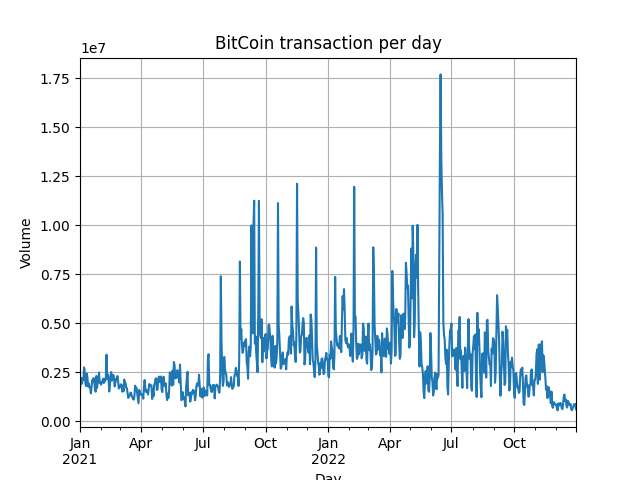

In [24]:
%matplot plt

## BitCoin weekly transaction 2021-2022

In [25]:
plt.clf()
pdf_transaction_weekly.plot(x='week', y='sum_weekly', legend=None)
plt.title('BitCoin transaction per week')
plt.xlabel('Week')
plt.ylabel('Volume')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

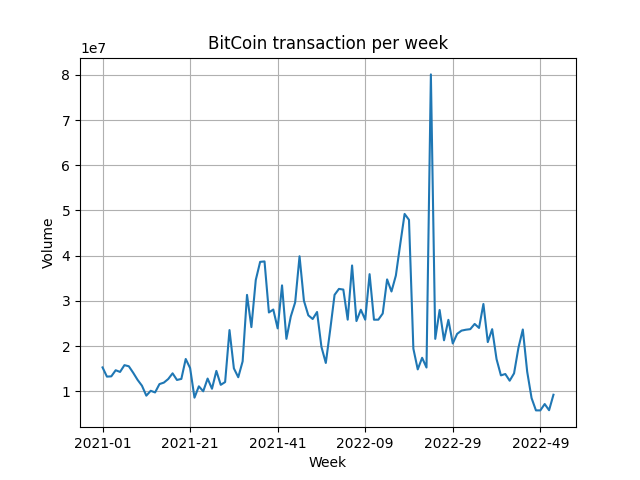

In [26]:
%matplot plt

## BitCoin monthly transaction 2021-2022

In [27]:
pdf_transaction_monthly = sdf_transaction_monthly_2.toPandas()
plt.clf()
pdf_transaction_monthly.plot(x='month', y='sum_monthly', legend=None)
plt.title('BitCoin transaction per month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid()
# plt.ticklabel_format(useOffset=False, style='plain') # without math notation

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

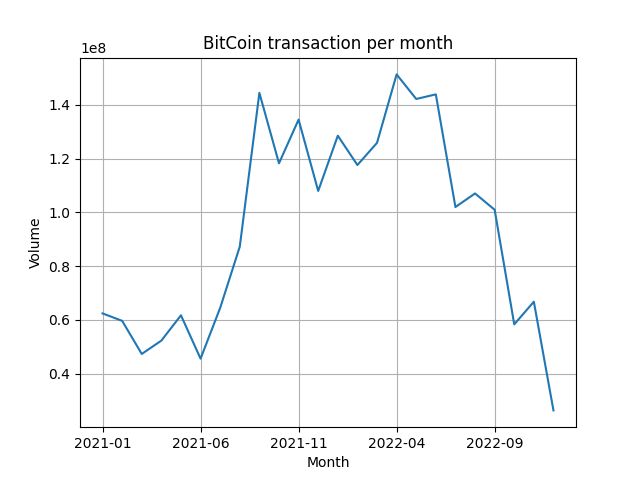

In [28]:
%matplot plt

## USD/PLN EXCHANGE 2021-2022

In [29]:
usd_to_pln_pdf = usd_to_pln_df.toPandas()
usd_to_pln_pdf.rename(columns = {'_c0':'exchange'}, inplace = True)
usd_to_pln_pdf['date'] = work_days_calendar(modulo=False)
usd_to_pln_pdf['exchange'] = usd_to_pln_pdf['exchange'].astype('float64')
usd_to_pln_pdf['date'] = pd.to_datetime(usd_to_pln_pdf['date'], format='%Y%m%d')
usd_to_pln_pdf
plt.clf()
usd_to_pln_pdf.plot(x='date', y='exchange', legend=None)
plt.title('USD/PLN Exchange in 2021-2022')
plt.xlabel('Days')
plt.ylabel('PLN')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

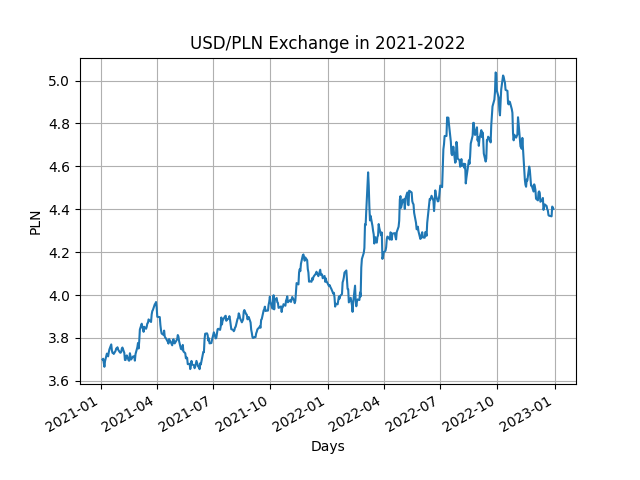

In [30]:
%matplot plt

## Daily BitCoin in USD 2021-2022

In [31]:
# Daily BTC in USD
pdf1 = btc_to_usd_df.toPandas()
pdf1.rename(columns = {'_c0':'Date', '_c1':'ValueUSD'}, inplace = True)

pdf1['Date'] = pd.to_datetime(pdf1['Date'], format='%Y%m%d')
pdf1['ValueUSD'] = pd.to_numeric(pdf1['ValueUSD'])

plt.clf()
pdf1.plot(x='Date', y='ValueUSD', legend=None)
plt.title('Daily BTC value in USD')
plt.xlabel('Date')
plt.ylabel('Value in USD')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

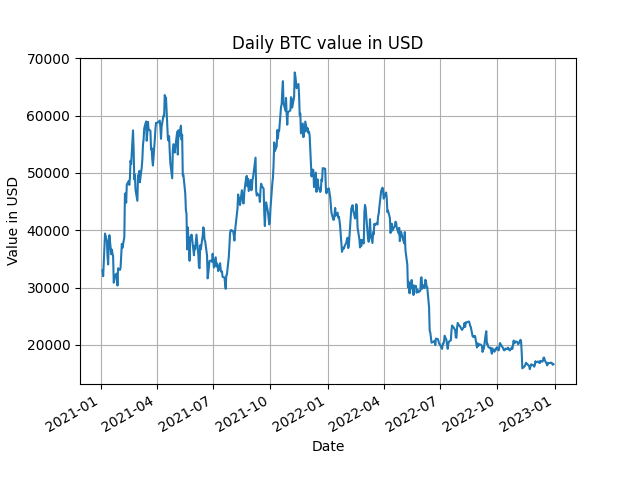

In [32]:
%matplot plt

## Daily BitCoin in PLN 2021-2022

In [33]:
# Daily BTC in PLN
pdf2 = btc_to_pln_df.toPandas()
pdf2.rename(columns = {'_c0':'Date', '_c1':'ValuePLN'}, inplace = True)

pdf2['Date'] = pd.to_datetime(pdf2['Date'], format='%Y%m%d')
pdf2['ValuePLN'] = pd.to_numeric(pdf2['ValuePLN'])

plt.clf()
pdf2.plot(x='Date', y='ValuePLN', legend=None)
plt.title('Daily BTC value in PLN')
plt.xlabel('Date')
plt.ylabel('Value in PLN')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

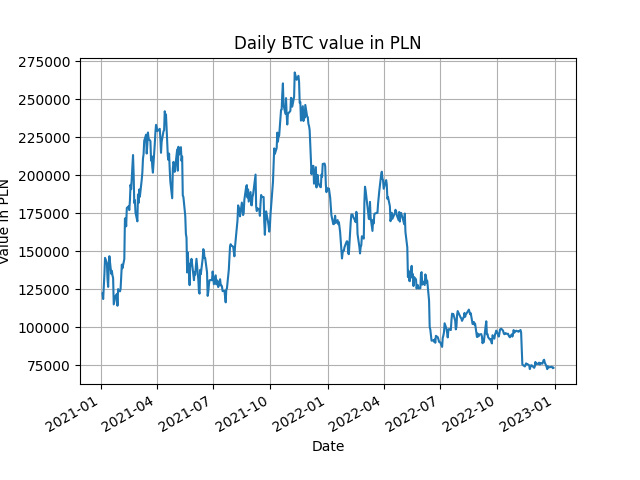

In [34]:
%matplot plt

## Monthly BitCoin in USD 2021-2022

In [35]:
from pyspark.sql.functions import mean
pdf3 = btc_to_usd_df.toPandas()
pdf3.rename(columns = {'_c0':'Date', '_c1':'ValueUSD'}, inplace = True)
pdf3['Date'] = pd.to_datetime(pdf3['Date'], format='%Y%m%d')
pdf3['month'] = pdf3['Date'].dt.strftime('%Y-%m')
pdf3['ValueUSD'] = pd.to_numeric(pdf3['ValueUSD'])
sdf3 = spark.createDataFrame(pdf3)
sdf3_1 = sdf3.groupBy('month').agg(mean('ValueUSD').alias('mean')).sort('month')
sdf3_1.show()
months_USD = sdf3_1.toPandas()


plt.clf()
months_USD.plot(x='month', y='mean', legend=None)
plt.title('Monthly BTC value in USD')
plt.xlabel('Month')
plt.ylabel('Value in USD')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|  month|              mean|
+-------+------------------+
|2021-01| 34773.44210526315|
|2021-02|45372.157499999994|
|2021-03| 54056.27652173913|
|2021-04| 57063.38285714286|
|2021-05|         46469.093|
|2021-06|36156.624285714286|
|2021-07| 34191.39545454545|
|2021-08|45014.992272727264|
|2021-09| 45912.87409090909|
|2021-10| 57329.59095238094|
|2021-11| 61045.91449999999|
|2021-12| 49789.57913043479|
|2022-01|         41360.132|
|2022-02|         40496.436|
|2022-03| 42136.85913043479|
|2022-04| 41728.19799999999|
|2022-05|31685.215714285714|
|2022-06|24835.386666666665|
|2022-07|21323.247142857144|
|2022-08|         22478.415|
+-------+------------------+
only showing top 20 rows

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

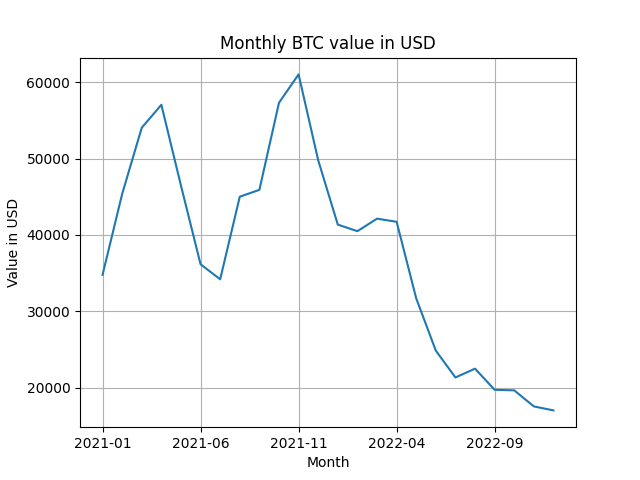

In [36]:
%matplot plt

## Monthly BitCoin in PLN 2021-2022

In [37]:
pdf4 = btc_to_pln_df.toPandas()
pdf4.rename(columns = {'_c0':'Date', '_c1':'ValuePLN'}, inplace = True)
pdf4['Date'] = pd.to_datetime(pdf4['Date'], format='%Y%m%d')
pdf4['month'] = pdf4['Date'].dt.strftime('%Y-%m')
pdf4['ValuePLN'] = pd.to_numeric(pdf4['ValuePLN'])
sdf4 = spark.createDataFrame(pdf4)
sdf4_1 = sdf4.groupBy('month').agg(mean('ValuePLN').alias('mean')).sort('month')
sdf4_1.show()
months_PLN = sdf4_1.toPandas()


plt.clf()
months_PLN.plot(x='month', y='mean', legend=None)
plt.title('Monthly BTC value in PLN')
plt.xlabel('Month')
plt.ylabel('Value in PLN')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|  month|              mean|
+-------+------------------+
|2021-01| 129639.5815963158|
|2021-02|    168591.8888136|
|2021-03|209003.00741578257|
|2021-04|217810.35978309525|
|2021-05|173506.78649429997|
|2021-06| 135180.0317522381|
|2021-07|131966.70100504544|
|2021-08|174807.79325222725|
|2021-09|177970.66834713638|
|2021-10| 226998.9514035238|
|2021-11|248797.45176045006|
|2021-12| 203353.0736794783|
|2022-01|166206.53194659998|
|2022-02|162422.51773220004|
|2022-03|181676.23810365217|
|2022-04|179109.06982570002|
|2022-05|139306.41759890478|
|2022-06|108581.01950280953|
|2022-07|  99919.9527537619|
|2022-08|104786.21431781817|
+-------+------------------+
only showing top 20 rows

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

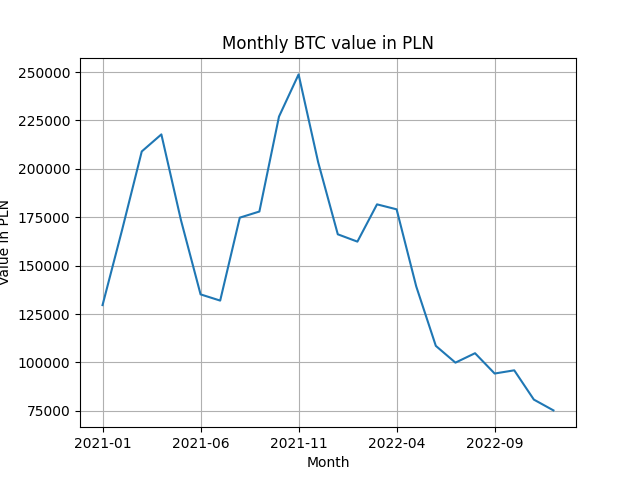

In [38]:
%matplot plt

## Weekly BitCoin in USD 2021-2022

In [39]:
pdf5 = btc_to_usd_df.toPandas()
pdf5.rename(columns = {'_c0':'Date', '_c1':'ValueUSD'}, inplace = True)
pdf5['Date'] = pd.to_datetime(pdf5['Date'], format='%Y%m%d')
pdf5['week'] = pdf5['Date'].dt.strftime('%Y-%V')
pdf5['ValueUSD'] = pd.to_numeric(pdf5['ValueUSD'])

sdf5 = spark.createDataFrame(pdf5)
sdf5_1 = sdf5.groupBy('week').agg(mean('ValueUSD').alias('mean')).sort('week')
sdf5_1.show()

weekly_USD = sdf5_1.toPandas()

plt.clf()
weekly_USD.plot(x='week', y='mean', legend=None)
plt.title('Weekly BTC value in USD')
plt.xlabel('Week No.')
plt.ylabel('Value in USD')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|   week|              mean|
+-------+------------------+
|2021-01|          35297.91|
|2021-02|         36825.226|
|2021-03|         34933.922|
|2021-04|         32141.604|
|2021-05|         35327.936|
|2021-06|44873.441999999995|
|2021-07|          49859.06|
|2021-08|51428.191999999995|
|2021-09|         48377.988|
|2021-10|54366.740000000005|
|2021-11|         57607.198|
|2021-12|53875.009999999995|
|2021-13| 57923.91799999999|
|2021-14|57787.744999999995|
|2021-15|61910.418000000005|
|2021-16|         54737.344|
|2021-17|         53296.268|
|2021-18|56051.057499999995|
|2021-19|         53987.212|
|2021-20|          42002.25|
+-------+------------------+
only showing top 20 rows

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

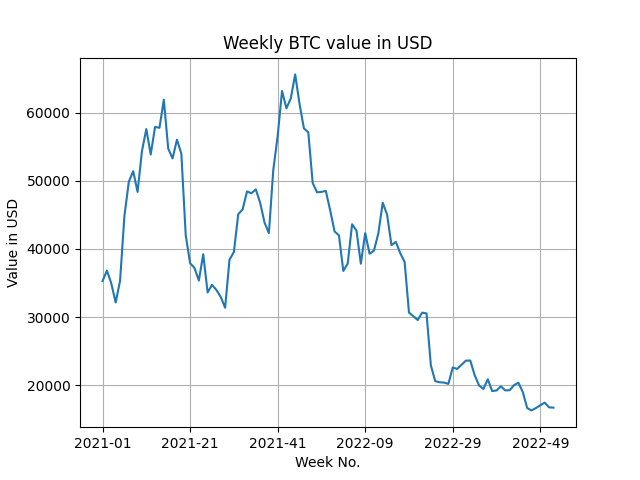

In [40]:
%matplot plt

## Weekly BitCoin in PLN 2021-2022

In [41]:
pdf6 = btc_to_usd_df.toPandas()
pdf6.rename(columns = {'_c0':'Date', '_c1':'ValuePLN'}, inplace = True)
pdf6['Date'] = pd.to_datetime(pdf5['Date'], format='%Y%m%d')
pdf6['week'] = pdf6['Date'].dt.strftime('%Y-%V')
pdf6['ValuePLN'] = pd.to_numeric(pdf6['ValuePLN'])

sdf6 = spark.createDataFrame(pdf6)
sdf6_1 = sdf6.groupBy('week').agg(mean('ValuePLN').alias('mean')).sort('week')
sdf6_1.show()

weekly_PLN = sdf6_1.toPandas()

plt.clf()
weekly_PLN.plot(x='week', y='mean', legend=None)
plt.title('Weekly BTC value in USD')
plt.xlabel('Week No.')
plt.ylabel('Value in USD')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|   week|              mean|
+-------+------------------+
|2021-01|          35297.91|
|2021-02|         36825.226|
|2021-03|         34933.922|
|2021-04|         32141.604|
|2021-05|         35327.936|
|2021-06|44873.441999999995|
|2021-07|          49859.06|
|2021-08|51428.191999999995|
|2021-09|         48377.988|
|2021-10|54366.740000000005|
|2021-11|         57607.198|
|2021-12|53875.009999999995|
|2021-13| 57923.91799999999|
|2021-14|57787.744999999995|
|2021-15|61910.418000000005|
|2021-16|         54737.344|
|2021-17|         53296.268|
|2021-18|56051.057499999995|
|2021-19|         53987.212|
|2021-20|          42002.25|
+-------+------------------+
only showing top 20 rows

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

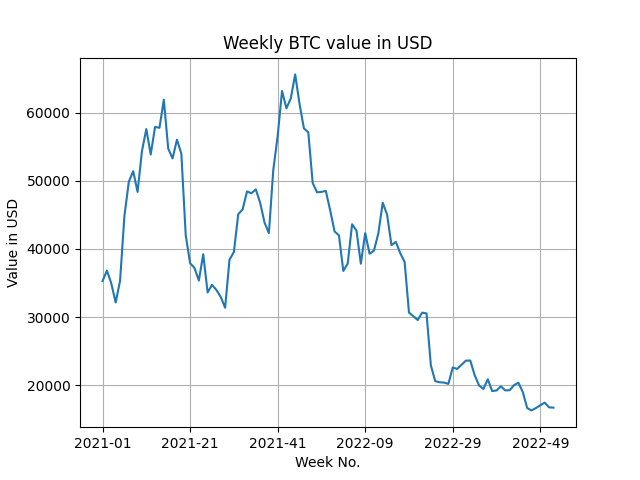

In [42]:
%matplot plt

## Monthly BitCoin transaction in USD 2021-2022

In [43]:
months_USD['mean'] = pdf_transaction_monthly['sum_monthly'] * months_USD['mean']

plt.clf()
months_USD.plot(x='month', y='mean', legend=None)
plt.title('Monthly BTC transaction in USD')
plt.xlabel('Month')
plt.ylabel('Value in USD')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

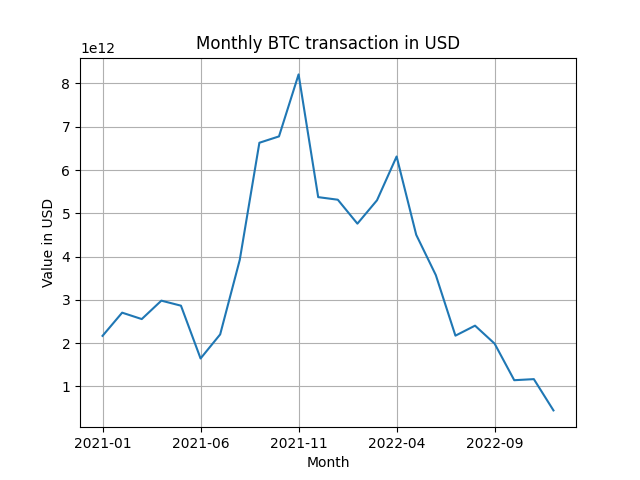

In [44]:
%matplot plt

## Monthly BitCoin transaction in PLN 2021-2022

In [45]:
months_PLN['mean'] = pdf_transaction_monthly['sum_monthly'] * months_PLN['mean']

plt.clf()
months_PLN.plot(x='month', y='mean', legend=None)
plt.title('Monthly BTC transaction in PLN')
plt.xlabel('Month')
plt.ylabel('Value in PLN')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

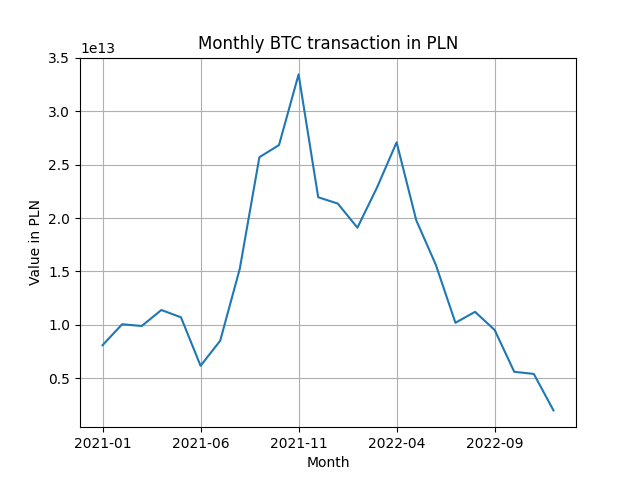

In [46]:
%matplot plt

## Weekly BitCoin transaction in USD 2021-2022

In [47]:
weekly_USD['mean_USD'] = pdf_transaction_weekly['sum_weekly']*weekly_USD['mean']
plt.clf()
weekly_USD.plot(x='week', y='mean_USD', legend=None)
plt.title('Weekly BTC transaction in USD')
plt.xlabel('Week')
plt.ylabel('Value in USD')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

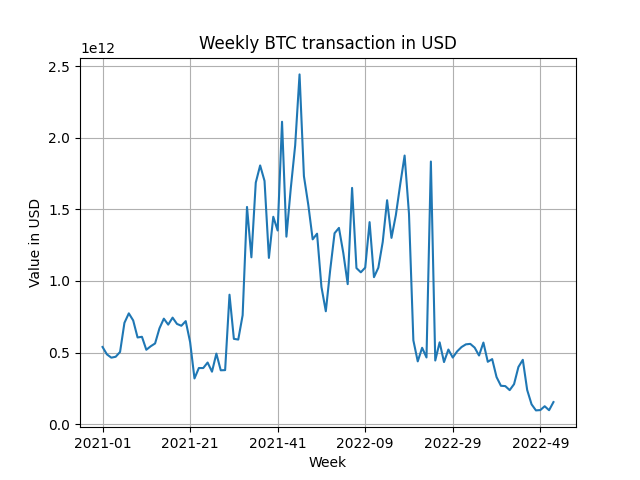

In [48]:
%matplot plt

## Weekly BitCoin transaction in PLN 2021-2022

In [49]:
weekly_PLN['mean_PLN'] = pdf_transaction_weekly['sum_weekly'] * weekly_PLN['mean']

plt.clf()
weekly_PLN.plot(x='week', y='mean_PLN', legend=None)
plt.title('Weekly BTC transaction in PLN')
plt.xlabel('Week')
plt.ylabel('Value in PLN')
plt.grid()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

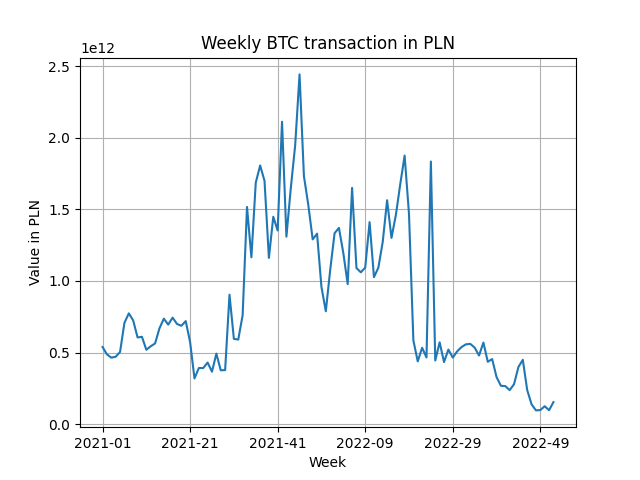

In [50]:
%matplot plt